<div style="display: top; background-image:url('https://d1.awsstatic.com/SageMaker/SageMaker%20reInvent%202020/ImgHead_Mohave.3b1df33baa5f71b53237bfa6911fb3adc4902c0e.png');background-position: center ;background-repeat: no-repeat;background-size: 100%; padding-top:20px;">
<div style="color:#FFFFFF; text-align: top;padding-bottom: 25px; padding-left: 15px"><h1 style="font-weight: 900;">Exploratory Data Analysis - SOLUTION</h1>
</div>
</div>
<br>

In this notebook, we go through basic steps of exploratory data analysis (EDA), performing initial data investigations to discover patterns, spot anomalies, and look for insights to inform later ML modeling choices.

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Overall Statistics</a>
3. <a href="#3">Univariate Statistics: Basic Plots</a>
4. <a href="#4">Multivariate Statistics: Scatter Plots and Correlations</a>
5. <a href="#5">Handling Missing Values</a>
    * <a href="#51">Drop columns with missing values</a>
    * <a href="#52">Drop rows with missing values</a>
    * <a href="#53">Impute (fill-in) missing values with .fillna()</a>
    * <a href="#54">Impute (fill-in) missing values with sklearn's SimpleImputer</a>
    
__Austin Animal Center Dataset__:

In this exercise, we are working with pet adoption data from __Austin Animal Center__. We have two datasets that cover intake and outcome of animals. Intake data is available from [here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) and outcome is from [here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238). 

In order to work with a single table, we joined the intake and outcome tables using the "Animal ID" column and created a single __Austin_Animal_dataset.csv__ file. We also didn't consider animals with multiple entries to the facility to keep our dataset simple. If you want to see the original datasets and the merged data with multiple entries, they are available under `DATA/austin-animal` folder: Austin_Animal_Center_Intakes.csv, Austin_Animal_Center_Outcomes.csv and Austin_Animal_Center_Intakes_Outcomes.csv.

__Dataset schema:__ 
- __Pet ID__ - Unique ID of pet
- __Outcome Type__ - State of pet at the time of recording the outcome (0 = not placed, 1 = placed). This is the field to predict.
- __Sex upon Outcome__ - Sex of pet at outcome
- __Name__ - Name of pet 
- __Found Location__ - Found location of pet before entered the center
- __Intake Type__ - Circumstances bringing the pet to the center
- __Intake Condition__ - Health condition of pet when entered the center
- __Pet Type__ - Type of pet
- __Sex upon Intake__ - Sex of pet when entered the center
- __Breed__ - Breed of pet 
- __Color__ - Color of pet 
- __Age upon Intake Days__ - Age of pet when entered the center (days)
- __Age upon Outcome Days__ - Age of pet at outcome (days)


In [1]:
# Import all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

Let's read the dataset into a dataframe, using Pandas.

In [2]:
# This reads in the dataset from a specified file location
df = pd.read_csv("../../DATA/austin-animal/Austin_Animal_dataset.csv")

# This prints the shape (number of rows & columns) for a dataset
print("The shape of the dataset is:", df.shape)

The shape of the dataset is: (95485, 13)


## 2. <a name="2">Overall Statistics</a>
(<a href="#0">Go to top</a>)

We will look at number of rows, columns and some simple statistics of the dataset. Execture the cells below to have a look at the dataset.

In [3]:
# Print the first five rows
# NaN means missing data
df.head()

Pet ID  Outcome Type Sex upon Outcome        Name  \
0  A794011           1.0    Neutered Male       Chunk   
1  A776359           1.0    Neutered Male       Gizmo   
2  A674754           0.0      Intact Male         NaN   
3  A689724           1.0    Neutered Male  *Donatello   
4  A680969           1.0    Neutered Male       *Zeus   

                        Found Location      Intake Type Intake Condition  \
0                          Austin (TX)  Owner Surrender           Normal   
1    7201 Levander Loop in Austin (TX)            Stray           Normal   
2        12034 Research in Austin (TX)            Stray          Nursing   
3     2300 Waterway Bnd in Austin (TX)            Stray           Normal   
4  4701 Staggerbrush Rd in Austin (TX)            Stray          Nursing   

  Pet Type Sex upon Intake                    Breed               Color  \
0      Cat   Neutered Male   Domestic Shorthair Mix   Brown Tabby/White   
1      Dog     Intact Male  Chihuahua Shorthair Mix         White/Brown   
2      Cat     Intact Male   Domestic Shorthair Mix        Orange Tabby   
3      Cat     Intact Male   Domestic Shorthair Mix               Black   
4      Cat     Intact Male   Domestic Shorthair Mix  White/Orange Tabby   

   Age upon Intake Days  Age upon Outcome Days  
0                   730                    730  
1                   365                    365  
2                     6                      6  
3                    60                     60  
4                     7                     60

Use the `.info()` method to get a summary of the content in your dataframe.

In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95485 entries, 0 to 95484
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pet ID                 95485 non-null  object 
 1   Outcome Type           95485 non-null  float64
 2   Sex upon Outcome       95484 non-null  object 
 3   Name                   59138 non-null  object 
 4   Found Location         95485 non-null  object 
 5   Intake Type            95485 non-null  object 
 6   Intake Condition       95485 non-null  object 
 7   Pet Type               95485 non-null  object 
 8   Sex upon Intake        95484 non-null  object 
 9   Breed                  95485 non-null  object 
 10  Color                  95485 non-null  object 
 11  Age upon Intake Days   95485 non-null  int64  
 12  Age upon Outcome Days  95485 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 9.5+ MB


In [5]:
# This prints basic statistics for numerical columns
df.describe()

Outcome Type  Age upon Intake Days  Age upon Outcome Days
count  95485.000000          95485.000000           95485.000000
mean       0.564005            703.436959             717.757313
std        0.495889           1052.252197            1055.023160
min        0.000000              0.000000               0.000000
25%        0.000000             30.000000              60.000000
50%        1.000000            365.000000             365.000000
75%        1.000000            730.000000             730.000000
max        1.000000           9125.000000            9125.000000

Let's separate model features and model target. First, try to print all column names with `print(df.columns)`.

In [6]:
print(df.columns)

Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')


From the dataset schema at the beginning of the notebook, we now that `Outcome Type` is the target we eventually want to predict. We therefore want to assign it to a variable, that we will call `model_target`:

In [7]:
model_features = df.columns.drop("Outcome Type")
model_target = "Outcome Type"

print("Model features: ", model_features)
print("Model target: ", model_target)

Model features:  Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color',
       'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')
Model target:  Outcome Type


We can explore the features set further, figuring out first what features are numerical or categorical. Beware that some integer-valued features could actually be categorical features, and some categorical features could be text features. 

In [8]:
numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
print("Numerical columns:", numerical_features_all)

print("")

categorical_features_all = df[model_features].select_dtypes(include="object").columns
print("Categorical columns:", categorical_features_all)

Numerical columns: Index(['Age upon Intake Days', 'Age upon Outcome Days'], dtype='object')

Categorical columns: Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color'],
      dtype='object')


## 3. <a name="3">Basic Plots</a>
(<a href="#0">Go to top</a>)

In this section, we examine our data with plots. Important note: These plots ignore null (missing) values. We will learn how to deal with missing values later.


__Bar plots__: These plots show counts of categorical data fields. `value_counts()` function yields the counts of each unique value. It is useful for categorical variables.

First, let's look at the distribution of the model target.

In [9]:
df[model_target].value_counts()

1.0    53854
0.0    41631
Name: Outcome Type, dtype: int64

Adding `.plot.bar()` after to the `value_counts()` statement creates a bar chart of the values. Try this out below. Make sure to also add a line with `plt.show()` as this in invokes the chart to be shown.

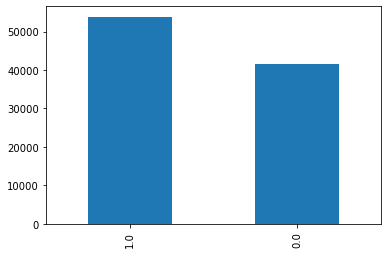

In [10]:
df[model_target].value_counts().plot.bar()
plt.show()

In the cell below, create a bar plot for one of the categorical features of the dataset, e.g. `Pet Type`. Use the code that was used to plot the counts of target values and adapt it for `Pet Type`.

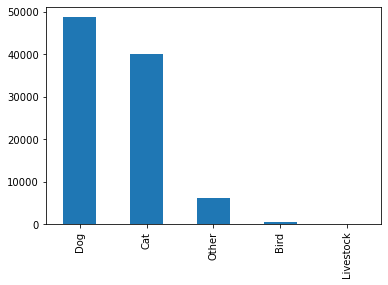

In [11]:
df["Pet Type"].value_counts().plot.bar()
plt.show()

__Histograms:__ Histograms show distribution of numeric data. Data is divided into "buckets" or "bins". We use histograms for numerical data to group datapoints together into buckets. In the cell below, create a loop that plots histograms for all numerical features. Use the above code snippet for categorical features as guidance.

The command to create a histogram is `df[feature_name].plot.hist(bins=5)`; as we are looking at the numerical features now, make sure to loop over `numerical_features_all` (we created this variable earlier).

Age upon Intake Days


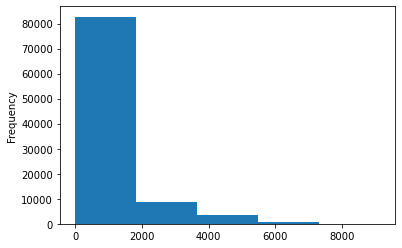

Age upon Outcome Days


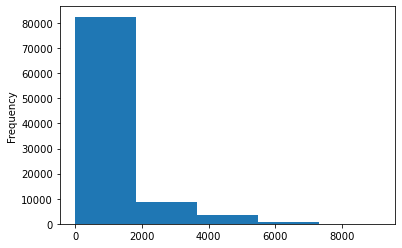

In [12]:
for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=5)  # Define the number of buckets
    plt.show()

If for some histograms the values are heavily placed in the first bin, we can increase the number of histogram bins. This will give a more refined view of the numerical features.

In [14]:
for c in numerical_features_all:
    print(c)
    print(df[c].value_counts(bins=10, sort=False))
    print("\n")

Age upon Intake Days
(-9.126, 912.5]     74835
(912.5, 1825.0]     10647
(1825.0, 2737.5]     3471
(2737.5, 3650.0]     3998
(3650.0, 4562.5]     1234
(4562.5, 5475.0]     1031
(5475.0, 6387.5]      183
(6387.5, 7300.0]       79
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: Age upon Intake Days, dtype: int64


Age upon Outcome Days
(-9.126, 912.5]     74642
(912.5, 1825.0]     10699
(1825.0, 2737.5]     3465
(2737.5, 3650.0]     4080
(3650.0, 4562.5]     1263
(4562.5, 5475.0]     1061
(5475.0, 6387.5]      187
(6387.5, 7300.0]       81
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: Age upon Outcome Days, dtype: int64




To check the range of features, we can use `.min()` and `.max()`:

In [13]:
for c in numerical_features_all:
    print(c)
    print("min:", df[c].min(), "max:", df[c].max())

Age upon Intake Days
min: 0 max: 9125
Age upon Outcome Days
min: 0 max: 9125


## 4. <a name="4">Scatter Plots and Correlation</a>
(<a href="#0">Go to top</a>)

### Scatter plot
Scatter plots are simple 2D plots of two numerical variables that can be used to examine the relationship between two variables. If one variable is moving up and so is the other, it is a so-called positive correlation. If one variable moves down and the other moves up, it is a negative correlation.

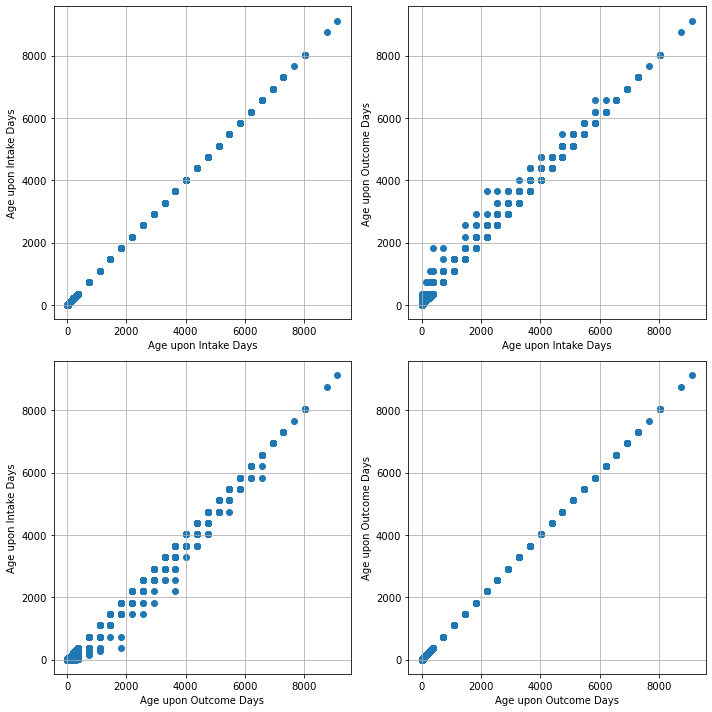

In [15]:
fig, axes = plt.subplots(
    len(numerical_features_all),
    len(numerical_features_all),
    figsize=(10, 10),
    sharex=False,
    sharey=False,
)

for i in range(0, len(numerical_features_all)):
    for j in range(0, len(numerical_features_all)):
        axes[i, j].scatter(
            x=df[numerical_features_all[i]], y=df[numerical_features_all[j]]
        )
        axes[i, j].set_xlabel(numerical_features_all[i])
        axes[i, j].set_ylabel(numerical_features_all[j])
        axes[i, j].grid()
fig.tight_layout()

### Correlation Matrix Heatmap
We plot the correlation matrix. Correlation scores are calculated for numerical fields. 

In [16]:
cols = [numerical_features_all[0], numerical_features_all[1]]

df[cols].corr().style.background_gradient(cmap="tab20c")

Similar to scatterplots, but now the correlation matrix values can more clearly pinpoint relationships between the numerical features. Correlation values of -1 means perfect negative correlation, 1 means perfect positive correlation, and 0 means there is no relationship between the two numerical features.

Also, more exploratory data analysis might reveal other important hidden atributes and/or relationships of the model features considered. 

## 5. <a name="5">Handling Missing Values</a>
(<a href="#0">Go to top</a>)

  * <a href="#51">Drop columns with missing values</a>
  * <a href="#52">Drop rows with missing values</a>
  * <a href="#53"> Impute (fill-in) missing values with .fillna()</a>
  * <a href="#54"> Impute (fill-in) missing values with sklearn's SimpleImputer</a>

Let's first check the number of missing (nan) values for each column.

In [17]:
df.isna().sum()

Pet ID                       0
Outcome Type                 0
Sex upon Outcome             1
Name                     36347
Found Location               0
Intake Type                  0
Intake Condition             0
Pet Type                     0
Sex upon Intake              1
Breed                        0
Color                        0
Age upon Intake Days         0
Age upon Outcome Days        0
dtype: int64

Let's explore a few options dealing with missing values, when there are values missing on many features, both numerical and categorical types. 

### <a name="51">Drop columns with missing values</a>
(<a href="#5">Go to Handling Missing Values</a>)

We can drop some feautures/columns if we think there is significant amount of missing data in those features. Here we 
are dropping features having more than 20% missing values.


In [18]:
threshold = 2 / 10  # Setting a threshold to remove
print((df.isna().sum() / len(df.index)))
columns_to_drop = df.loc[
    :, list(((df.isna().sum() / len(df.index)) >= threshold))
].columns
print(columns_to_drop)

df_columns_dropped = df.drop(
    columns_to_drop, axis=1
)  # You can also use inplace=True to drop features inplace without assignment

Pet ID                   0.000000
Outcome Type             0.000000
Sex upon Outcome         0.000010
Name                     0.380657
Found Location           0.000000
Intake Type              0.000000
Intake Condition         0.000000
Pet Type                 0.000000
Sex upon Intake          0.000010
Breed                    0.000000
Color                    0.000000
Age upon Intake Days     0.000000
Age upon Outcome Days    0.000000
dtype: float64
Index(['Name'], dtype='object')


Use the `.isna().sum()` statement to check how many missing values there are in `df_columns_dropped`.

In [19]:
df_columns_dropped.isna().sum()

Pet ID                   0
Outcome Type             0
Sex upon Outcome         1
Found Location           0
Intake Type              0
Intake Condition         0
Pet Type                 0
Sex upon Intake          1
Breed                    0
Color                    0
Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64

In [20]:
df_columns_dropped.shape

(95485, 12)

Note the reduced size of the dataset features. This can sometimes lead to underfitting models (not having enough features to build a good model able to capture the pattern in the dataset).

### <a name="52">Drop rows with missing values</a>
(<a href="#5">Go to Handling Missing Values</a>)

Here, we simply drop rows that have at least one missing value. There are other drop options to explore, depending on specific problems.

In [21]:
df_missing_dropped = df.dropna()

Let's check the missing values below.

In [22]:
df_missing_dropped.isna().sum()

Pet ID                   0
Outcome Type             0
Sex upon Outcome         0
Name                     0
Found Location           0
Intake Type              0
Intake Condition         0
Pet Type                 0
Sex upon Intake          0
Breed                    0
Color                    0
Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64

In [23]:
df_missing_dropped.shape

(59137, 13)

Note the reduced size of the dataset features. This can sometimes lead to underfitting models (not having enough features to build a good model able to capture the pattern in the dataset).

### <a name="53">Impute (fill-in) missing values with .fillna()</a>
(<a href="#5">Go to Handling Missing Values</a>)

Rather than dropping rows (data samples) and/or columns (features), another strategy to deal with missing values would be to actually complete the missing values with new values: imputation of missing values.

__Imputing Numerical Values:__ The easiest way to impute numerical values is to get the __average (mean) value__ for the corresponding column and use that as the new value for each missing record in that column. 

In [24]:
# Impute numerical features by using the mean per feature to replace the nans

# Assign our df to a new df
df_imputed = df.copy()

# Impute our two numerical features with the means.
df_imputed[numerical_features_all] = df_imputed[numerical_features_all].fillna(
    df_imputed[numerical_features_all].mean()
)


__Imputing Categorical Values:__ We can impute categorical values by getting the most common (mode) value for the corresponding column and use that as the new value for each missing record in that column. 

In [25]:
# Impute categorical features by using the mode per feature to replace the nans

# Assign our df to a new df
df_imputed_c = df.copy()

for c in categorical_features_all:
    # Find the mode per each feature
    mode_impute = df_imputed_c[c].mode()
    print("The missing values for \"%s\" will be filled with \"%s\"." %(c, mode_impute[0]))

    # Impute our categorical features with the mode
    # "inplace=True" parameter replaces missing values in place (no need for left handside assignment)
    df_imputed_c[c].fillna(False, inplace=True)

The missing values for "Pet ID" will be filled with "A047759".
The missing values for "Sex upon Outcome" will be filled with "Neutered Male".
The missing values for "Name" will be filled with "Bella".
The missing values for "Found Location" will be filled with "Austin (TX)".
The missing values for "Intake Type" will be filled with "Stray".
The missing values for "Intake Condition" will be filled with "Normal".
The missing values for "Pet Type" will be filled with "Dog".
The missing values for "Sex upon Intake" will be filled with "Intact Male".
The missing values for "Breed" will be filled with "Domestic Shorthair Mix".
The missing values for "Color" will be filled with "Black/White".


We can also create a new category, such as "Missing", for alll or elected categorical features.

In [26]:
# Impute categorical features by using a placeholder value

# Assign our df to a new df
df_imputed = df.copy()
print(df_imputed[categorical_features_all].isna().sum())

# Impute our categorical features with a new category named "Missing".
df_imputed[categorical_features_all] = df_imputed[categorical_features_all].fillna(
    "Missing"
)
print("\n")
print(df_imputed[categorical_features_all].isna().sum())

Pet ID                  0
Sex upon Outcome        1
Name                36347
Found Location          0
Intake Type             0
Intake Condition        0
Pet Type                0
Sex upon Intake         1
Breed                   0
Color                   0
dtype: int64


Pet ID              0
Sex upon Outcome    0
Name                0
Found Location      0
Intake Type         0
Intake Condition    0
Pet Type            0
Sex upon Intake     0
Breed               0
Color               0
dtype: int64


### <a name="54">Impute (fill-in) missing values with sklearn's __SimpleImputer__</a>
(<a href="#5">Go to Handling Missing Values</a>)

A more elegant way to implement imputation is using sklearn's __SimpleImputer__, a class implementing `.fit()` and `.transform()` methods.


In [27]:
# Impute numerical columns by using the mean per column to replace the nans

# Assign our df to a new df
df_sklearn_imputed = df.copy()
print(df_sklearn_imputed[numerical_features_all].isna().sum())

imputer = SimpleImputer(strategy="mean")
df_sklearn_imputed[numerical_features_all] = imputer.fit_transform(
    df_sklearn_imputed[numerical_features_all]
)

print(df_sklearn_imputed[numerical_features_all].isna().sum())

Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64
Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64


In [28]:
# Impute categorical columns by using the mode per column to replace the nans

# Pick some categorical features you desire to impute with this approach
categoricals_missing_values = (
    df[categorical_features_all]
    .loc[:, list(((df[categorical_features_all].isna().sum() / len(df.index)) > 0.0))]
    .columns
)
columns_to_impute = categoricals_missing_values[1:3]
print(columns_to_impute)

Index(['Name', 'Sex upon Intake'], dtype='object')


In [29]:
# Assign our df to a new df
df_sklearn_imputer = df.copy()
print(df_sklearn_imputer[columns_to_impute].isna().sum())

imputer = SimpleImputer(strategy="most_frequent")
df_sklearn_imputer[columns_to_impute] = imputer.fit_transform(
    df_sklearn_imputer[columns_to_impute]
)
print("\n")
print(df_sklearn_imputer[columns_to_impute].isna().sum())

Name               36347
Sex upon Intake        1
dtype: int64


Name               0
Sex upon Intake    0
dtype: int64
